# Dataset Selection

This is the dataset I chose: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

I will be using the Star Classification Dataset. I chose to solve the problem of classifying stars, galaxies, and quasars.

# Part 1

Neural Network Implementation

In [24]:
#Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Loading the dataset
path = 'star_classification.csv'
data = pd.read_csv(path)

In [4]:
class NeuralNetwork:
    
    #Initializes the neural network with a structure defined by the layers parameter
    def __init__(self, layers):
        
        #Total number of layers
        self.num_layers = len(layers)
        #Initializing biases and weights with random value
        self.biases = [np.random.randn(y, 1) for y in layers[1:]]
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(layers[:-1], layers[1:])]
        
    #Forward Propagation Function
    def forward_prop(self, x):
        
        #Looping through each layer of the network except input layer
        for b, w in zip(self.biases, self.weights):
            #Weighted input and bias and the sigmoid activation function
            x = self.sigmoid(np.dot(w, x) + b)
            
        return x
    
    #Backward Propagation Function
    def backward_prop(self, x, y):
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        #Perform forward propagation
        activation = x
        activations = [x]
        zs = []
        for i in range(len(self.biases)):
            b = self.biases[i]
            w = self.weights[i]
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)
            
        #Compute the partial derivatives for the output layer
        delta = self.cost_derivative(activations[-1], y) * self.sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())

        #Backpropagate the error
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_prime(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].transpose())

        return (nabla_b, nabla_w)
    
    #Function to update parameters for a mini batch
    def update_mini_batch(self, mini_batch, eta):
       
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        #Looping through each training example
        for x, y in mini_batch:
            #Calculating the gradient
            delta_nabla_b, delta_nabla_w = self.backward_prop(x, y)
            
            #Updating the gradient
            for i in range(len(nabla_b)):
                nabla_b[i] += delta_nabla_b[i]
                nabla_w[i] += delta_nabla_w[i]
        
        #Updating weights and biases
        for i in range(len(self.weights)):
            self.weights[i] -= (eta/len(mini_batch)) * nabla_w[i]
            self.biases[i] -= (eta/len(mini_batch)) * nabla_b[i]
        
    #Function to train the NN
    def train(self, training_data, epochs, mini_batch_size, eta):
        
        n = len(training_data)
        
        #Looping as many times as epochs specified
        for j in range(epochs):
            #Shuffling the training data
            np.random.shuffle(training_data)
            #Creating mini batches
            mini_batches = [training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            
            #Looping through the mini batches
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
                
            print(f"Epoch {j+1} complete")
    
    #Function to calculate cost function
    def cost(self, output_activations, y):
    
        #Calculating the quadratic cost
        return 0.5 * np.linalg.norm(output_activations - y) ** 2
    
    #Function for predictions
    def predict(self, x):
        
        return self.forward_prop(x)

    #Sigmoid Activation Function calculation
    def sigmoid(self, z):
    
        return 1.0/(1.0 + np.exp(-z))

    #Derivative of Sigmoid Activation Function
    def sigmoid_prime(self, z):
       
        return self.sigmoid(z) * (1-self.sigmoid(z))

    #Function for derivative of the cost function
    def cost_derivative(self, output_activations, y):
        
        return (output_activations - y)

In [5]:
#Selecting features and target
X = data.drop('class', axis=1).values
y = data['class'].values

#Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#One-hot encoding the target variable
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

#Shape of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

/Users/arthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((80000, 17), (20000, 17), (80000, 3), (20000, 3))

In [6]:
#Defining the layers
layers = [17, 64, 32, 3]
nn = NeuralNetwork(layers)

#Training the model
training_data = [(x.reshape(17, 1), y.reshape(3, 1)) for x, y in zip(X_train, y_train)]
epochs = 100 
mini_batch_size = 10
eta = 3.0

nn.train(training_data, epochs, mini_batch_size, eta)

/var/folders/6h/jvj1v_bx7kldrcbf4gl1ml7m0000gn/T/ipykernel_75881/12584660.py:110: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-z))


Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
Epoch 30 complete
Epoch 31 complete
Epoch 32 complete
Epoch 33 complete
Epoch 34 complete
Epoch 35 complete
Epoch 36 complete
Epoch 37 complete
Epoch 38 complete
Epoch 39 complete
Epoch 40 complete
Epoch 41 complete
Epoch 42 complete
Epoch 43 complete
Epoch 44 complete
Epoch 45 complete
Epoch 46 complete
Epoch 47 complete
Epoch 48 complete
Epoch 49 complete
Epoch 50 complete
Epoch 51 complete
Epoch 52 complete
Epoch 53 complete
Epoch 54 complete
Epoch 55 complete
Epoch 56 complete
E

In [7]:
def evaluate(X, y, model):
    predictions = []
    true_labels = np.argmax(y, axis=1) 
    
    for i in range(X.shape[0]):
        #reshaping the input data
        x = X[i].reshape(-1, 1) 
        output = model.predict(x)
        predicted_label = np.argmax(output)
        predictions.append(predicted_label)
    
    accuracy = accuracy_score(true_labels, predictions)
    return accuracy

training_accuracy = evaluate(X_train, y_train, nn)
testing_accuracy = evaluate(X_test, y_test, nn)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

/var/folders/6h/jvj1v_bx7kldrcbf4gl1ml7m0000gn/T/ipykernel_75881/12584660.py:110: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-z))


Training Accuracy: 0.97675
Testing Accuracy: 0.96945


I used mini-batch gradient descent. This helps with the computational cost of the neural network. The model trained much quicker than without the mini-batch function. It was also straightforward to implement. 

# Part 2

# Task 1

I chose to use Pytorch for implementing a 2-layer Neural Network. 

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html: For learning the basics of Pytorch including setting up tensors, gradients, and building a simple neural network

https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch: Pytorch for building a neural network

I will need:
- torch.nn
- torch.optim.Adam
- torch.ReLu

# Task 2

Exploratory Data Analysis (EDA)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#Viewing the first few rows of the dataset to see all the features of the dataset
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [10]:
#Getting basic information about the dataset
#Shows the number of rows and columns
data.shape

(100000, 18)

In [11]:
#Summary of the data
data.describe(include='all')

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59445,NaN,NaN,NaN,NaN
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,NaN,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,NaN,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,NaN,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,NaN,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,NaN,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,NaN,0.704154,7400.250000,56777.000000,645.000000


In [12]:
#Number of missing values for each column
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

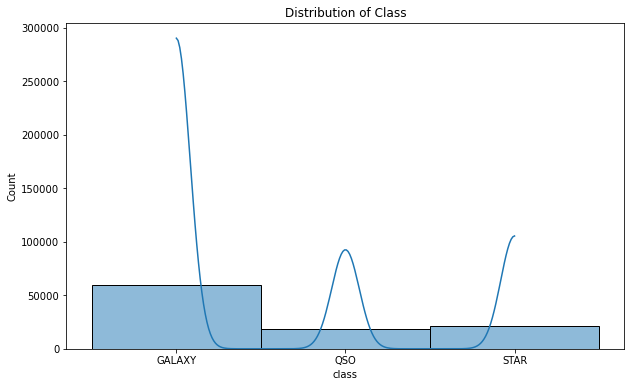

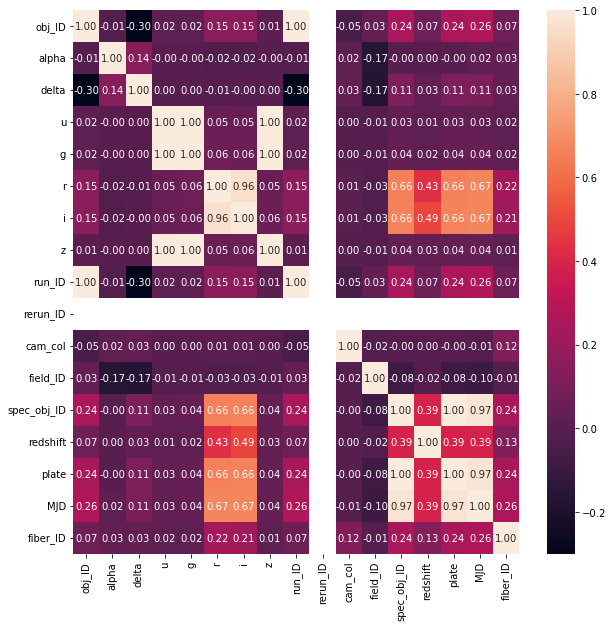

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['class'], kde=True)
plt.title(f'Distribution of Class')
plt.show()

#Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

Train-Dev-Test Split

In [14]:
#Intializing X and y
X = data.drop('class', axis=1).values
y = data['class'].values

#Splitting datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Normalizing the inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Forward Propagation

In [15]:
#Importing necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder

In [16]:
#Hyperparameters
input_size = X_train.shape[1]
hidden_size = 280
output_size = len(np.unique(y))

#Weight and bias initialization
W1 = torch.randn(input_size, hidden_size, requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)
W2 = torch.randn(hidden_size, output_size, requires_grad=True)
b2 = torch.zeros(output_size, requires_grad=True)

#Forward propagation function
def forward(X):
    Z1 = torch.mm(X, W1) + b1
    A1 = torch.relu(Z1) #ReLu Activation Function
    Z2 = torch.mm(A1, W2) + b2
    return Z2

Cost Function

In [17]:
def compute_cost(predictions, labels):
    log_probs = torch.log_softmax(predictions, dim=1)
    correct_log_probs = log_probs.gather(1, labels.unsqueeze(1)).squeeze()
    return -torch.mean(correct_log_probs)

Gradient Descent

In [18]:
#Encoding class labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#Convert encodwd labels to tensor
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)

#Adam optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam([W1, b1, W2, b2], lr = learning_rate)

epochs = 1000

#Training
for epoch in range(epochs): 
    optimizer.zero_grad()
    predictions = forward(X_train_tensor)
    loss = compute_cost(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch} complete")

Epoch 0 complete
Epoch 100 complete
Epoch 200 complete
Epoch 300 complete
Epoch 400 complete
Epoch 500 complete
Epoch 600 complete
Epoch 700 complete
Epoch 800 complete
Epoch 900 complete


Results

In [19]:
#Disabling gradient
with torch.no_grad():
    #passing the test dataset through the NN for predictions
    predictions_test = forward(X_test_tensor)
    test_loss = compute_cost(predictions_test, y_test_tensor)
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.47100377082824707


In [23]:
_, predicted_labels = torch.max(predictions_test, 1)

predicted_labels_np = predicted_labels.cpu().numpy()
y_test_np = y_test_tensor.cpu().numpy()

#Accurary, Precision, recall, and F1 score
accuracy = accuracy_score(y_test_np, predicted_labels_np)
precision = precision_score(y_test_np, predicted_labels_np, average='weighted')
recall = recall_score(y_test_np, predicted_labels_np, average='weighted')
f1 = f1_score(y_test_np, predicted_labels_np, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.9073
Precision: 0.9072577093867056
Recall: 0.9073
F1: 0.9072638087147927


# Task 3

The hyperparameters used were:
- Hidder Layer Size: 280

  I increased this from the standard 64 as the model was more complex and could use more neurons. I kept increasing the value until I felt it was affecting the efficiency of the model and overfitting of the model.
  
  
- Learning Rate: 0.001

    I kept this standard value as it is typical for the Adam optimizer, which I used.
    
    
- Number of Epochs: 1000

    I intially had the number of epochs at 100, which resulted in a really high loss (around 5) and very low metrics. Once I increased the epochs to 1000, the results improved significantly. This means the model needed many more iterations to converge.
  
Techniques:
- ReLu Activation function

  I chose this function for its simplicity and efficiency. The function allows the model to learn more complex patterns.
  
  
- Adam Optimizer function

    I chose this optimizer function to ensure efficiency and convergence of the model

  

   


# Task 4

In [21]:
#Importing necessary libraries
from sklearn.linear_model import LogisticRegression

In [22]:
#Using Logistic Regression classifier
logreg = LogisticRegression(max_iter = 1000)

logreg.fit(X_train, y_train_encoded)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test_encoded, y_pred_logreg)
precision_logreg = precision_score(y_test_encoded, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test_encoded, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test_encoded, y_pred_logreg, average='weighted')
print(f'Logistic Regression Accuracy: {accuracy_logreg}')
print(f'Logistic Regression Precision: {precision_logreg}')
print(f'Logistic Regression Recall: {recall_logreg}')
print(f'Logistic Regression F1: {f1_logreg}')

Logistic Regression Accuracy: 0.9563
Logistic Regression Precision: 0.9561525203787263
Logistic Regression Recall: 0.9563
Logistic Regression F1: 0.955880395918298


Neural Network Metrics:

- Accuracy: 0.9073
- Precision: 0.9072577093867056
- Recall: 0.9073
- F1 Score: 0.9072638087147927

Logistic Regression Metrics:

- Accuracy: 0.9563
- Precision: 0.9561525203787263
- Recall: 0.9563
- F1: 0.955880395918298

Logistic Regression performs better than the Neural Network model for this dataset. This could be due to overfitting with NN model. This dataset is also fairly simple in relation to others. So, logisitic regression seems good enough. 